In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
ds=pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP 5 MARCH\ml project\house price prediction 8th ml project\houseprice.csv")
print(ds)
print(ds.head(4))
print(ds.tail(4))
print(ds.shape)
print(ds.info)
print(ds.describe)

                  date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 00:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 00:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 00:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 00:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 00:00  5.500000e+05         4       2.50         1940   
...                ...           ...       ...        ...          ...   
4595  09-07-2014 00:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 00:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 00:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 00:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 00:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0    

In [2]:
print(ds.isnull().sum())



date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


<Figure size 1080x864 with 0 Axes>

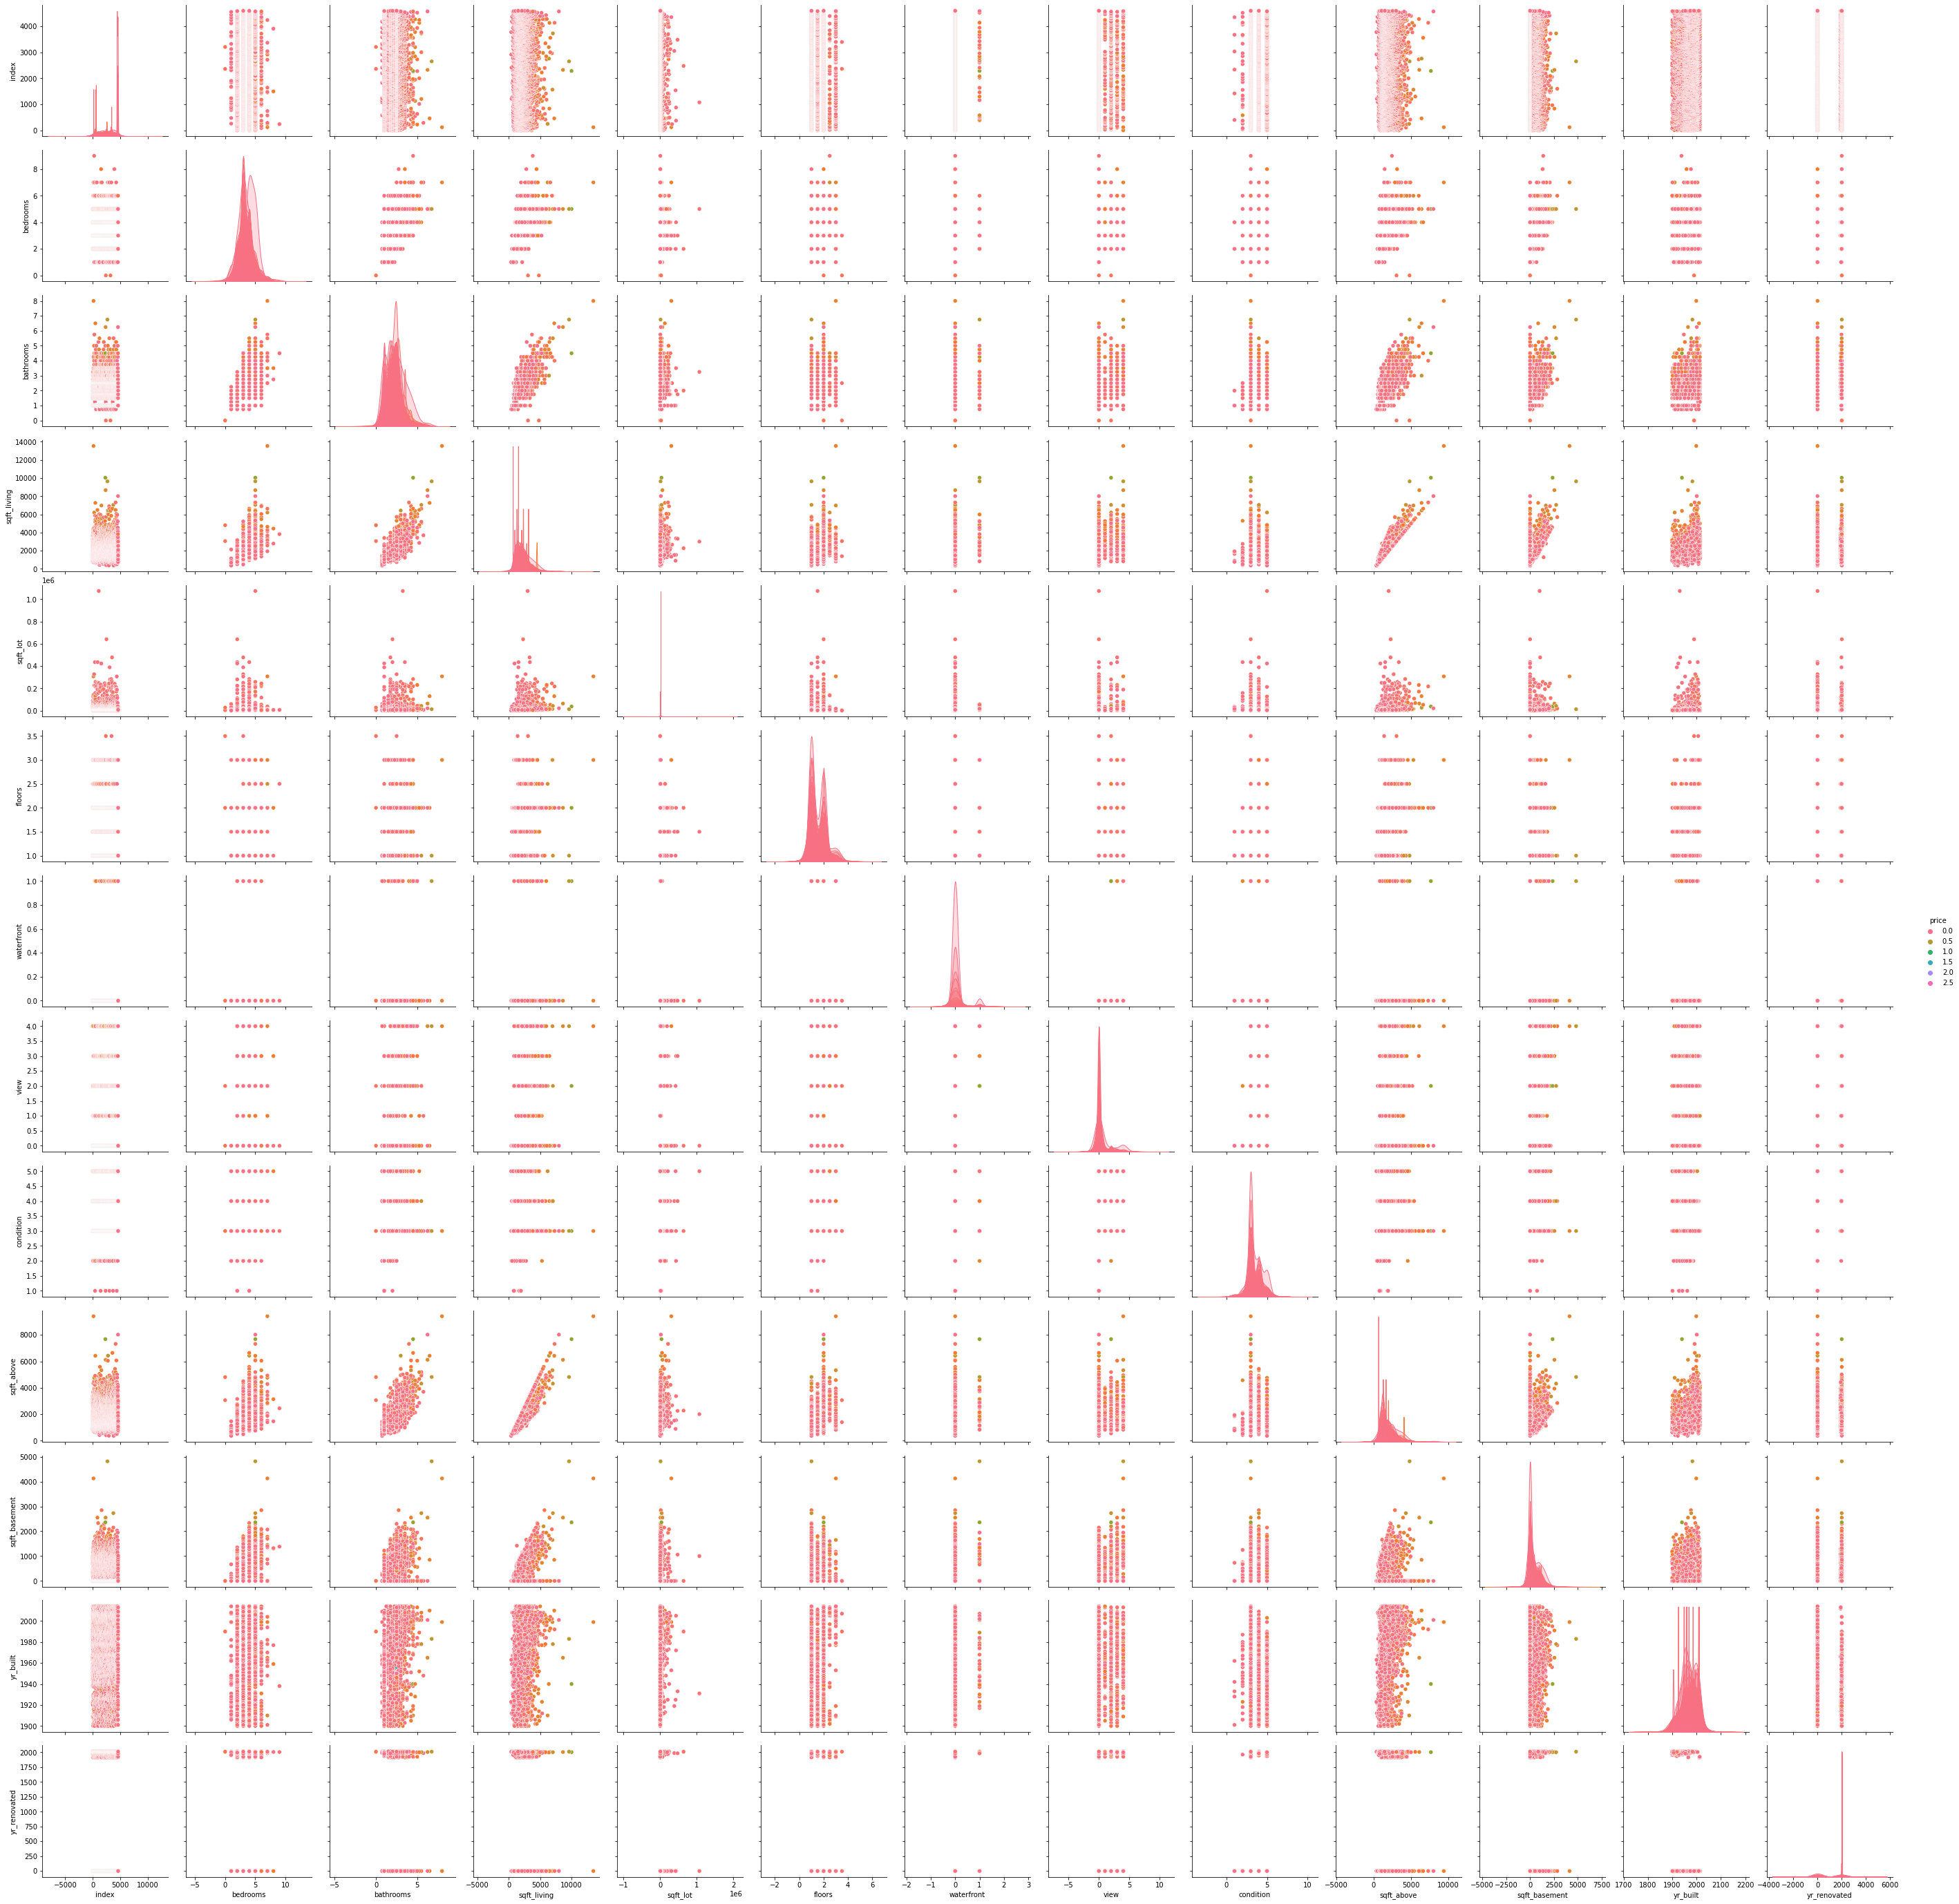

In [3]:
plt.figure(figsize=(15,12))
sns.pairplot(ds.reset_index(),palette="husl",hue="price",height=3)
plt.show()

['02-05-2014 00:00' '02-05-2014 00:00' '02-05-2014 00:00' ...
 '09-07-2014 00:00' '10-07-2014 00:00' '10-07-2014 00:00'] [ 313000.     2384000.      342000.     ...  416904.1667  203400.
  220600.    ]


C:\ProgramData\Anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


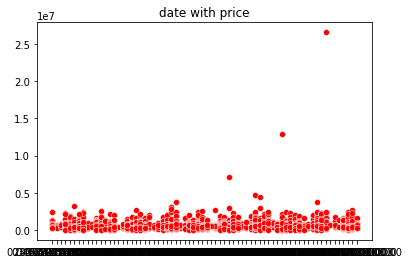

In [4]:
s=ds.iloc[:,0].values
a=ds.iloc[:,1].values
print(s,a)
sns.scatterplot(s, a, color="red")
plt.title("date with price")
plt.show()

[1340 3370 1930 ... 3010 1070 1490] [ 313000.     2384000.      342000.     ...  416904.1667  203400.
  220600.    ]


C:\ProgramData\Anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


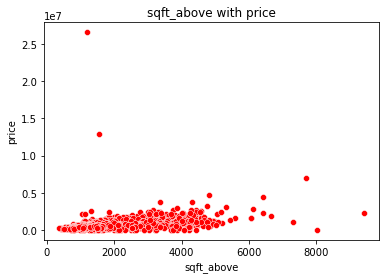

In [5]:
s=ds.iloc[:,-4].values
a=ds.iloc[:,1].values
print(s,a)
sns.scatterplot(s, a, color="red")
plt.title("sqft_above with price")
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()

In [6]:
#find the x and y
d=ds.drop("date",axis="columns")

y=ds.iloc[:,1].values
x=ds.drop(columns=["price","date"],axis=True)
print(y)
print(x)

[ 313000.     2384000.      342000.     ...  416904.1667  203400.
  220600.    ]
      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.50         1340      7912     1.5           0     0   
1            5       2.50         3650      9050     2.0           0     4   
2            3       2.00         1930     11947     1.0           0     0   
3            3       2.25         2000      8030     1.0           0     0   
4            4       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595         3       1.75         1510      6360     1.0           0     0   
4596         3       2.50         1460      7573     2.0           0     0   
4597         3       2.50         3010      7014     2.0           0     0   
4598         4       2.00         2090      6630     1.0           0     0   
4599         3       2.50         1490      8102     2.0     

In [7]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
#feature scalling


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_test)
print(x_train)

'#feature scalling\n\n\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)\nprint(x_test)\nprint(x_train)'

In [36]:
#model train
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
#prediction
pre=model.predict(x_test)
print(pre)

[ 489311.38619472  704323.14292411  282029.85138259  666357.47593776
  786695.6120272   587648.61890998  259078.82187635  302658.31580885
  449553.17957676  492929.07632012  433952.88368996  328299.40912301
  343119.78402182  745573.09414893  280588.90800558  548330.95673628
  582061.90793517  460746.94811286  453324.22558278  540456.01329926
  355419.07222875  571149.90468174  649322.26514163  263907.36839267
  556635.21838111  632691.95147442  276835.78463683  275827.69020686
  614301.31816521  446928.25972442  499177.69230286  891669.30088017
  270517.02883603  386170.60708672  545797.15101303  447605.5146089
  281351.24452755  461409.13153122  663943.19561375  199208.24220849
  878568.86704402  435466.14146876  758714.77806745  520831.62256581
  461176.19938773  598292.41173915  526261.10976184  708475.45840579
  405262.02872996  832747.53326625 1058607.72076731  519077.543334
  393773.08486925  258323.05610201  446669.06219959 1299125.25144863
  339936.024395    273051.46394495  3

In [42]:
#new house
sqft_above=int(input('enter ur sqft_'))
sqft_living=int(input('enter ur sqft_living area '))
yr_built=int(input('enter ur year of house  built '))
bedrooms=int(input('enter ur bedrooms no. '))
bathrooms=int(input('enter ur  bathrooms no. '))
sqft_lot=int(input('enter ur  sqft_lot upto 1000. '))
floors=float(input('enter ur floors in float'))
waterfront=(input('enter ur   waterfront in below 5* '))
view =int(input('enter ur view in no. '))
condition=(input('enter ur  in condition in below 5* '))
sqft_basement =int(input('enter ur sqft_basement. '))

name=[[sqft_above,sqft_living,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built]]
result=model.predict(sc.transform(name))
print(result)


enter ur sqft_1500
enter ur sqft_living area 1000
enter ur year of house  built 2023
enter ur bedrooms no. 4
enter ur  bathrooms no. 5
enter ur  sqft_lot upto 1000. 500
enter ur floors in float1.5
enter ur   waterfront in below 5* 1
enter ur view in no. 4
enter ur  in condition in below 5* 4
enter ur sqft_basement. 500
[3.08445645e+08]


C:\ProgramData\Anaconda3\anaconda file\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
#output
print(r2_score(y_test,pre)*100)


46.019824969713106
